In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [301]:
data=pd.read_csv('HR.csv')

In [302]:
df=pd.DataFrame(data)

In [303]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [304]:
df.shape

(1470, 35)

The dataset has 1470 rows and 35 columns

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [306]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset

In [307]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Gives the datatypes of each column.Nine columns including the target variable is of datatype Object.

In [308]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Encoding the columns using label encoder

In [309]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['Over18']=le.fit_transform(df['Over18'])
df['OverTime']=le.fit_transform(df['OverTime'])


In [310]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

Shows the datatype of the columns after encoding

In [311]:
df['Attrition'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32>

Attrition is the target variable and is a classification problem

# Checking Outliers

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EmployeeCount               AxesSubplot(0.390714,0.642714;0.110714x0.107857)
EmployeeNumber              AxesSubplot(0.523571,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.789286,0.642714;0.110714x0.107857)
HourlyRate                     AxesSubplot(0.125,0.513286;0.110714x0.107857)

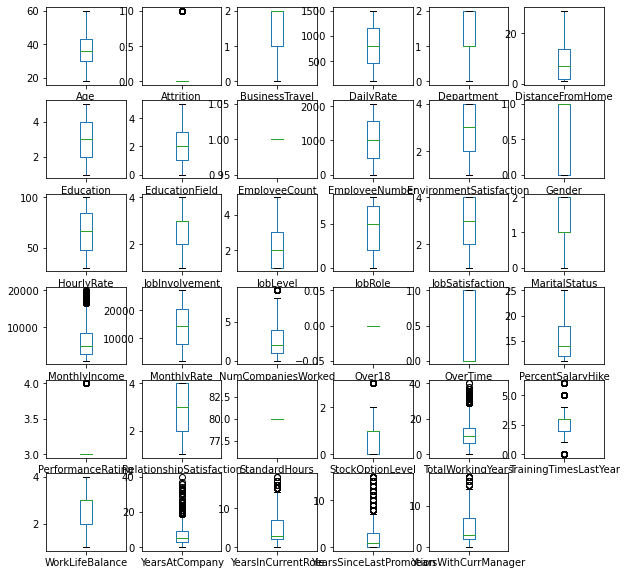

In [312]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

From the above plot we can see that there are outliers in the columns MonthlyIncome,NumCompaniesWorked,Performance rating,Total working years,Trainingtimeslastyear,years at company,years of current role,YearsSinceLastPromotion,YearsWithCurrManager

# Checking skewness

In [313]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

There is skewness in only few columns

# Dropping the columns EmployeeCount,StandardHours,Over18

In [314]:
x1=df.drop(['EmployeeCount','StandardHours','Over18'],axis=1)
df_new=x1

# Plotting attrition by incom level

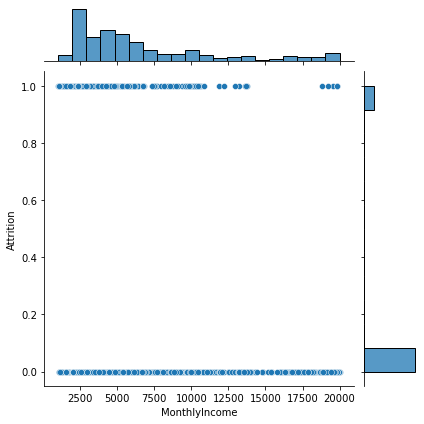

In [315]:

sns.jointplot(data=df_new,x=df_new['MonthlyIncome'],y=df_new['Attrition'])

The above plot shows how the attrition is spread based on monthly income

# Plotting attrition by department

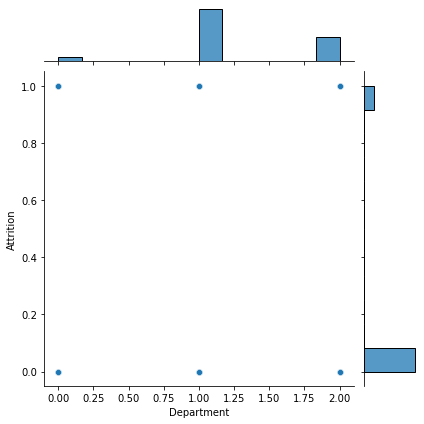

In [316]:


sns.jointplot(data=df_new,x=df_new['Department'],y=df_new['Attrition'])

The attrition rate is highest in the sales department,then HR and then research and development

# Plotting attrition by amount of business travel

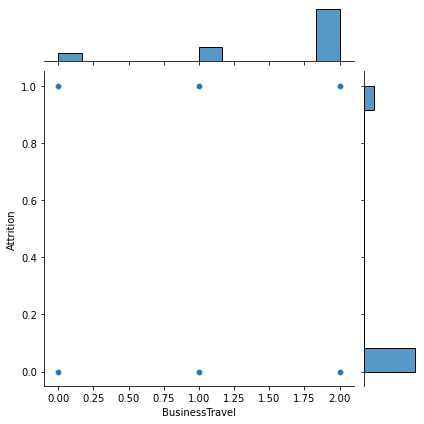

In [317]:

sns.jointplot(data=df_new,x=df_new['BusinessTravel'],y=df_new['Attrition'])

The attrition level is the highest in the Travel frequently,then travel rarely and the last is non travel classes.

# Attrition by education level 

<AxesSubplot:xlabel='Education', ylabel='Attrition'>

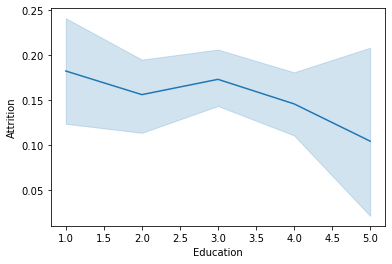

In [318]:

sns.lineplot(data=df_new,x=df_new['Education'],y=df_new['Attrition'])

The above graph shows the attrition level based on the education

# Attrition by Marital status

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

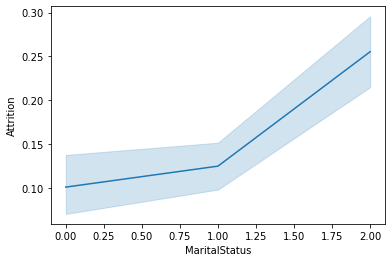

In [286]:
sns.lineplot(data=df_new,x=df_new['MaritalStatus'],y=df_new['Attrition'])

The attrition is highest with the married class,second is the single and then divorced

# Attrition by job involvement

<AxesSubplot:xlabel='JobInvolvement', ylabel='Attrition'>

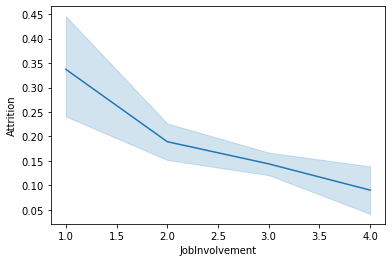

In [319]:
sns.lineplot(data=df_new,x=df_new['JobInvolvement'],y=df_new['Attrition'])

The above plot shows how the attrition is decreasing based on the involvement in the job

# Attrition by overtime

<AxesSubplot:xlabel='OverTime', ylabel='Attrition'>

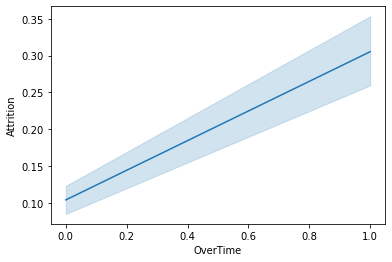

In [320]:
sns.lineplot(data=df_new,x=df_new['OverTime'],y=df_new['Attrition'])

The attrition level increases with the over time

# Attrition by years worked for company

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Attrition'>

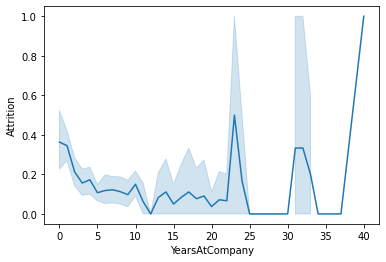

In [293]:
sns.lineplot(data=df_new,x=df_new['YearsAtCompany'],y=df_new['Attrition'])

The plot shows how the attrition is varying with the number of years worked with the company

# Attrition by years in current role

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Attrition'>

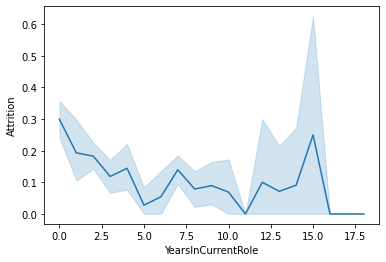

In [294]:
sns.lineplot(data=df_new,x=df_new['YearsInCurrentRole'],y=df_new['Attrition'])

The plot shows how the attrition is varying with the number of years in the current role

# Attrition by years with Current maanger

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Attrition'>

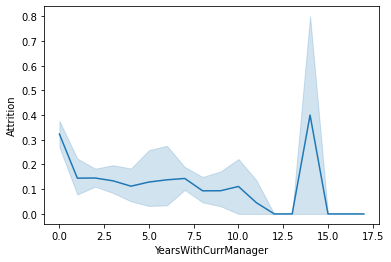

In [321]:
sns.lineplot(data=df_new,x=df_new['YearsWithCurrManager'],y=df_new['Attrition'])

The plot shows how the attrition is varying with the current manager

# Removing outliers

In [322]:
z=np.abs(zscore(df_new))
np.where(z>3)
df_new1=df_new[(z<3).all(axis=1)]

In [323]:
df_new.shape

(1470, 32)

In [325]:
df_new1.shape

(1387, 32)

The new dataset has 1387 rows ad 32 columns after removing outliers

# Checking Multicollinearity

<AxesSubplot:>

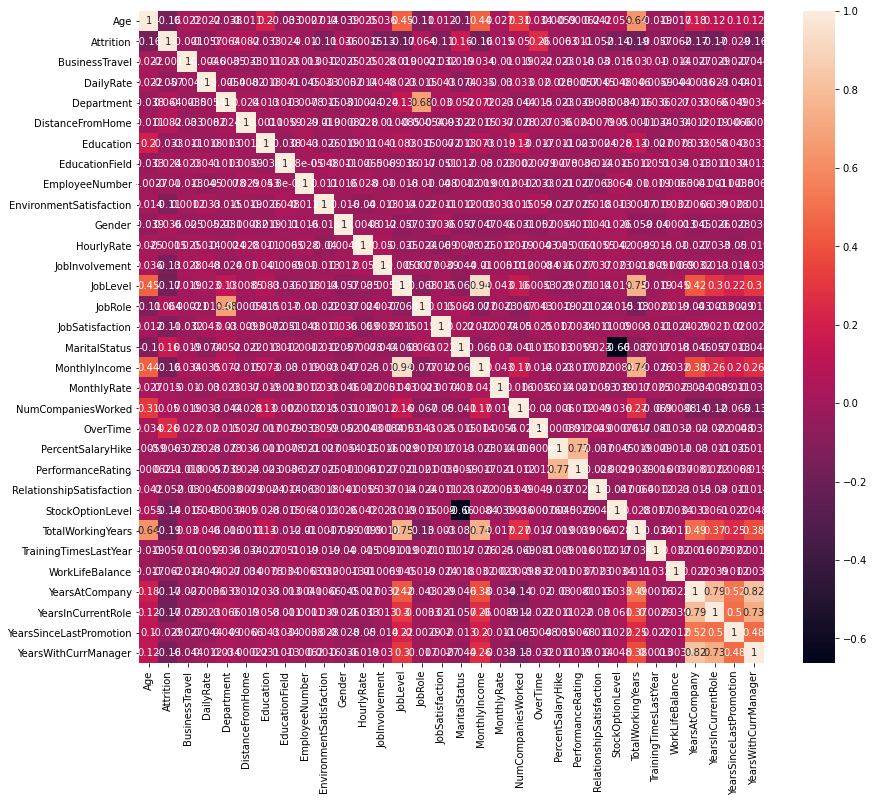

In [326]:
plt.figure(figsize=(14,12))
sns.heatmap(df_new1.corr(),annot=True)

    The lighter shades are highly correlated .We can see that the feature columns are correlated with ach other

<function matplotlib.pyplot.show(close=None, block=None)>

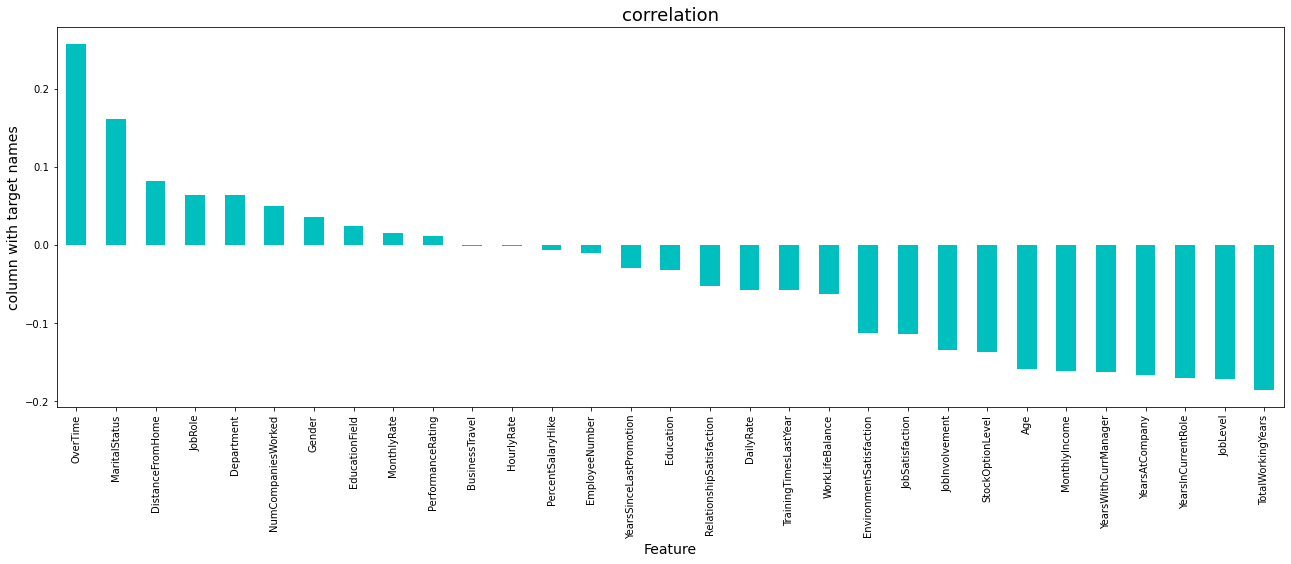

In [328]:
plt.figure(figsize=(22,7))
df_new1.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


From the above plot we can see the columns those are positively and negatively correlated with he target variable

# Dropping Overtime column

In [329]:
x2=df_new1.drop(['OverTime'],axis=1)
df_new2=x2

In [330]:
df_new2.shape

(1387, 31)

# Splitting the input and target variables

In [331]:
x3=df_new2.drop(['Attrition'],axis=1)
y=df_new2['Attrition']

In [332]:
def calc_vif(x3):
    vif=pd.DataFrame()
    vif["variables"]=x3.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x3.values,i) for i in range(x3.shape[1])]
    return (vif)

In [333]:
calc_vif(x3)

,variables,VIF FACTOR
0,Age,30.931398
1,BusinessTravel,6.663368
2,DailyRate,5.042079
3,Department,13.848964
4,DistanceFromHome,2.321952
5,Education,9.371758
6,EducationField,3.889959
7,EmployeeNumber,3.923512
8,EnvironmentSatisfaction,7.170023
9,Gender,2.527434


# Dropping age as it has high VIF

In [334]:
x3=df_new2.drop(['Age'],axis=1)

In [335]:
calc_vif(x3)

,variables,VIF FACTOR
0,Attrition,1.388857
1,BusinessTravel,6.652350
2,DailyRate,5.041004
3,Department,13.914859
4,DistanceFromHome,2.344939
5,Education,9.053338
6,EducationField,3.893625
7,EmployeeNumber,3.919045
8,EnvironmentSatisfaction,7.195696
9,Gender,2.535590


# Removing skewness using power_transform method

In [336]:
x=x3

In [337]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [338]:
x

array([[ 2.24872599,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [-0.44469624, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 2.24872599,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-0.44469624,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [-0.44469624, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.44469624,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

# Scaling the inpt variable

In [339]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Model selection

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [341]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=22,random_state=45)

# DecisionTreeClassifier

In [342]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  1


# LogisticRegression

In [343]:
lg=LogisticRegression()

In [344]:
lg.fit(train_x,train_y)

LogisticRegression()

In [345]:
pred=lg.predict(test_x)

In [346]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [347]:
accuracy_score(test_y,pred)

1.0

In [348]:
confusion_matrix(test_y,pred)

array([[15,  0],
       [ 0,  7]], dtype=int64)

In [351]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00         7\n\n    accuracy                           1.00        22\n   macro avg       1.00      1.00      1.00        22\nweighted avg       1.00      1.00      1.00        22\n'

The accuracy for Logistic regression is 100

# DecisionTreeClassifier

In [352]:
from sklearn.tree import DecisionTreeClassifier

In [353]:
dtc=DecisionTreeClassifier()

In [354]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [355]:
pred=dtc.predict(test_x)

In [234]:
accuracy_score(test_y,pred)

1.0

In [356]:
confusion_matrix(test_y,pred)

array([[15,  0],
       [ 0,  7]], dtype=int64)

In [357]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00         7\n\n    accuracy                           1.00        22\n   macro avg       1.00      1.00      1.00        22\nweighted avg       1.00      1.00      1.00        22\n'

The accuracy for Decision tree classifier  is 100

# KNeighborsClassifier

In [358]:
from sklearn.neighbors import KNeighborsClassifier

In [359]:
knn=KNeighborsClassifier(n_neighbors=5)

In [360]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [361]:
pred=knn.predict(test_x)

In [362]:
accuracy_score(test_y,pred)

0.9545454545454546

In [363]:
confusion_matrix(test_y,pred)

array([[15,  0],
       [ 1,  6]], dtype=int64)

In [364]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        15\n           1       1.00      0.86      0.92         7\n\n    accuracy                           0.95        22\n   macro avg       0.97      0.93      0.95        22\nweighted avg       0.96      0.95      0.95        22\n'

The accuracy score for KNN is 95.45

# SVC

In [365]:
from sklearn.svm import SVC

In [366]:
svc=SVC(kernel='poly')

In [367]:
svc.fit(train_x,train_y)

SVC(kernel='poly')

In [368]:
pred=svc.predict(test_x)

In [369]:
accuracy_score(test_y,pred)

1.0

In [370]:
confusion_matrix(test_y,pred)

array([[15,  0],
       [ 0,  7]], dtype=int64)

In [371]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00         7\n\n    accuracy                           1.00        22\n   macro avg       1.00      1.00      1.00        22\nweighted avg       1.00      1.00      1.00        22\n'

The accuracy score for SVC is 95.45

# Cross validation score

In [372]:
from sklearn.model_selection import cross_val_score

In [373]:
print(cross_val_score(lg,train_x,train_y,cv=5).mean())

1.0


In [374]:
print(cross_val_score(dtc,train_x,train_y,cv=5).mean())

1.0


In [375]:
print(cross_val_score(svc,train_x,train_y,cv=5).mean())

0.9963369963369964


In [376]:
print(cross_val_score(knn,train_x,train_y,cv=5).mean())

0.9589743589743589


Comparing the accuracy scores of different models and CV scores KNN is the best model.

# GridSearchCV

In [377]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [378]:
parameter={'n_neighbors':np.arange(0,6),
           'weights':['uniform','distance','callable'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
           'n_jobs':np.arange(0,5)
           }

In [379]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

In [380]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': array([0, 1, 2, 3, 4]),
                         'n_neighbors': array([0, 1, 2, 3, 4, 5]),
                         'weights': ['uniform', 'distance', 'callable']})

In [381]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 4, 'weights': 'distance'}

In [382]:
Final_model=KNeighborsClassifier(algorithm='auto',n_jobs=1,n_neighbors=4,weights='distance')
Final_model.fit(train_x,train_y)
pred=Final_model.predict(test_x) 
acc=accuracy_score(test_y,pred)

In [383]:
acc

0.9545454545454546

# Conclusion:KNN is the best model and the accuracy score is 95.45